Give the Poisson process, i.e. the first order differential equation that
results in P0(τ ), the probability that τ days after card purchase the card
has not been used yet.

The probability $P(0; \tau)$ of the card not being used at time $\tau$ gives us

$$
\frac{\partial}{\partial \tau} P(0,\tau) = -p(\tau) P(0,\tau)
$$

so

$$
\int \frac{1}{P(0,\tau)}\frac{\partial}{\partial \tau} P(0,\tau) \partial \tau = \int -p(\tau) \partial \tau
$$

$$
\begin{aligned}
\Rightarrow \log{(P(0,\tau))} &= \int_{0}^{\tau}-p(\tau) \partial\tau\\
P(0,\tau) &= e^{\int_{0}^{\tau}-p(\tau) \partial\tau}\\
\end{aligned}
$$


Give the Poisson process, i.e. the first order differential equation that
results in Q0(τ ), the probability that τ days after card purchase the card
has not been lost yet.



$$
\frac{\partial}{\partial \tau} Q(0,T) = -q Q(0,\tau)
$$

so

$$
\int \frac{1}{Q(0,\tau)}\frac{\partial}{\partial \tau} P(0,\tau) \partial \tau = \int -q \partial \tau
$$

$$
\begin{aligned}
\Rightarrow \log{(Q(0,\tau))} &= \left[-q\tau + C_0\right]_{0}^{\tau}\\
Q(0,\tau) &= e^{-q\tau}\\
\end{aligned}
$$


Work out P(τ ) to arrive at
P(τ ) = pe
−qτ−
p
q (1−e
−qτ )


given $p(\tau) = pe^{-q\tau}$

$$
\begin{aligned}
P(\tau) &= p(\tau)e^{-\int_{0}^{\tau}p(s)\partial s}\\
&= pe^{-q\tau}e^{-\int_{0}^{\tau}pe^{-qs}\partial s}\\
&= pe^{-q\tau}e^{\left[ \frac{p}{q} e^{-qs} \right]_{0}^{\tau}} \\
&= pe^{-q\tau}e^{\frac{p}{q} e^{-q\tau} - \frac{p}{q}} \\
&= pe^{-q\tau - \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
\end{aligned}
$$

Derive equation 4

The probability of a card bought at $t_0$ and used at $t_1$ is the probability of being used in the time interval $\tau = t_1 - t_0$ - the probability of not being used

$$
\begin{aligned}
P(1,\tau) &= pe^{-q\tau} - pe^{-q\tau - \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
&= pe^{-q\tau}\left(1 - e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)}\right)\\
\Rightarrow Norm(\tau) &= 1 - e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
\end{aligned}
$$

Derive equation 5

$$
\begin{aligned}
P(0,\tau) &= 1 - Norm(\tau) \\
&= e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)} \\
\end{aligned}
$$

Read in the provided dataset and split it into two, one of cards that have
been used, and one of cards that have not been used yet. You are allowed to
express purchase and use days as the number of days since 3-3-2013 to avoid
working with datetimes. (fuck datetimes)

In [20]:
%matplotlib inline

import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy as sp
from scipy.optimize import minimize
from matplotlib.patches import Ellipse
from datetime import date

In [21]:
reader = csv.reader(open('tentamen_data.csv'));

t0 = date(2013,3,3)
t1 = date(2014,4,7)

# Read data
skippedHeader = False
used = []
unused = []
avg_used = 0

for entry in reader:
    if not skippedHeader:
        skippedHeader = True
        continue
    purchased_date = date(int(entry[0][0:4]),int(entry[0][5:7]),int(entry[0][8:10]))
    if entry[1]:
        used_date = date(int(entry[1][0:4]),int(entry[1][5:7]),int(entry[1][8:10]))
        #this is a hack to avoid card purchased and spent on the same day
        #minimum 1 day existence for a card
        used.append({'purchased' : (purchased_date - t0).days, 'used' : (used_date - t0).days + 1})
        avg_used += (used_date - t0).days + 1 - (purchased_date - t0).days
    else:
        unused.append({'purchased' : (purchased_date - t0).days})
        avg_used += (t1 - t0).days + 1 - (purchased_date - t0).days

avg_used /= (len(used) + len(unused))
print avg_used
# for entry in unused:
#     print entry['purchased']


75


In [22]:
# for entry in used:
#     print entry

Explain why the normalization factor is needed in equation 6.

**just a guess - think about this again**
The normalization is needed because not all the time deltas will be the same so we need to normalize with respect to the evidence

For the used cards minimize the log-likelihood of equation 7 to obtain your
estimate of q and p.

In [23]:
def PoissonProcess(data, samples):
    
    def n(p,q):
        return 1 - math.exp((-p / q) * (1 - math.exp(-q * (t1 - t0).days)))

    def P(p,q,tau):
        return p * math.exp(-q*tau - (p/q) * (1 - math.exp(-q * tau)))

    def ll(p,q):
        L = 0
        for entry in data:
            try:
                L += math.log(P(p,q,entry['used'] - entry['purchased']) / n(p,q))#,entry['used'] - entry['purchased']))
            except:
                return float('inf')

        return (-2 * L)

    def G(x):
        return ll(x[0],x[1])

#     samples = 5

    p = np.linspace(0,1,samples) # range(1,10) # 
    q = np.linspace(0,1,samples) # range(1,10) #

    results = []
    mins = []

    for i in range(0,samples):
        minimized = minimize(G,[p[i],q[i]], method='Powell')
        results.append(minimized.x) # optimized parameters
        mins.append(minimized.fun) # score of the parameter
    
    return results, mins

results, mins = PoissonProcess(used,5)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars


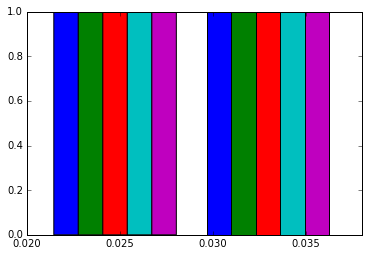

[array([ 0.02077728,  0.03702231]), array([ 0.02069022,  0.03696734]), array([ 0.02076837,  0.03700784]), array([ 0.02060772,  0.03707474]), array([ 0.02074887,  0.03699248])]


In [24]:
plt.hist(results, bins=2)
plt.show()

print results

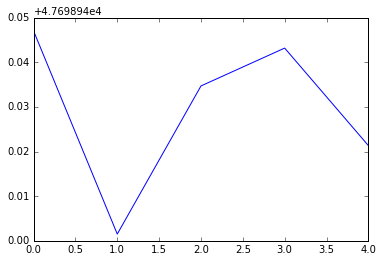

[array(47698.987015168896), array(47698.941510758144), array(47698.974691115254), array(47698.98317228243), array(47698.96133193614)]
47698.9415108


In [25]:
plt.plot(range(0, len(mins)),mins)
plt.show()

print mins
print min(mins)

In [26]:
min_mins = min(mins)
best_params = results[mins.index(min_mins)]
avg_params = [np.mean(results[:][0][0]),np.mean(results[:][0][1])]

print "min: ", min_mins, ", ",best_params
print "avg: ", np.mean(mins), ", ", avg_params

min:  47698.9415108 ,  [ 0.02069022  0.03696734]
avg:  47698.9695443 ,  [0.020777283738091193, 0.037022310745438061]


Use your estimates of q and p to estimate how many of the unused cards
will never be used in the future, and the amount of money that can be
deducted from the balance

In [27]:
def PP_test(params):
    
    def Pn(p,q,t):
        return math.exp(-(p/q)*math.exp(-q * ((t1 - t0).days - t)))

    Pnevers = []

    for entry in unused:
        # entry['purchased'], 
        Pnevers.append(Pn(params[0],params[1],entry['purchased']))

    return Pnevers

Pnevers = PP_test(avg_params)

total_unused = len(unused) * 10
print "total held: ", total_unused
print "expected spent: ", np.mean(Pnevers)*total_unused
print "expected unspent: ", total_unused*(1-np.mean(Pnevers))
 


total held:  42530
expected spent:  39412.1778761
expected unspent:  3117.82212389


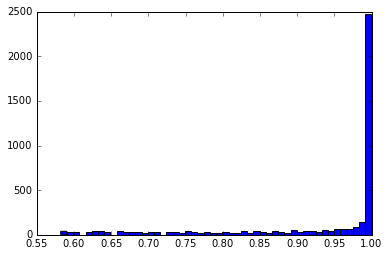

In [28]:
plt.hist(Pnevers,bins=50)
plt.show()

Write a Monte Carlo simulation that randomly generates a use day according
to P(t − t0) of equation 3 for each gift card in the entire dataset
using q0 and p0 for the model parameters.


In [57]:
def MC_sampler(data, params, initial_tau):
    MC_sim = []
    MC_err = []
    
    def P(p,q,tau):
        return p * math.exp(-q*tau - (p/q) * (1 - math.exp(-q * tau)))

    def H(t):
        d = np.random.rand()
        return abs(d - P(params[0],params[1],t))

    for entry in data:
#         print entry

        try:
            minimized = minimize(H, initial_tau, method='Powell')
            if minimized.x > 0:
                MC_sim.append({'purchased' : entry['purchased'], 'used' : entry['purchased'] + int(minimized.x)})
            else:
                MC_err.append({'purchased' : entry['purchased']})
        except:
            MC_err.append({'purchased' : entry['purchased']})
    
    return MC_sim, MC_err

**The number of samples that fall into used/unused is very dependent on the initial tau. For roughly the same ration as the initial data use ~150**

In [79]:
MC_sim, MC_err = MC_sampler(used + unused, avg_params, avg_used)

In [80]:
# print MC_sim

Split this generated dataset in two, one of cards with use days before or
at 7-4-2014, and one of cards without use days or with use days after
7-4-2014. Just like the real original dataset.

In [81]:
MC_used = [x for x in MC_sim if x['used'] < (t1 - t0).days]
MC_unused = [{'purchased' : x['purchased']} for x in MC_sim if x['used'] > (t1 - t0).days]

print "Original: "
print "    num used:   ", len(used)
print "    num unused: ", len(unused)

print "MC sim: "
print "    num used:   ", len(MC_used)
print "    num unused: ", len(MC_unused)
print "    num errors: ", len(MC_err)


Original: 
    num used:    5747
    num unused:  4253
MC sim: 
    num used:    7439
    num unused:  2493
    num errors:  45


In [82]:
# print new_unused

For the generated used cards minimize the log-likelihood of equation 7 to
obtain estimates of q and p and also use these on the generated unused
cards to obtain the amount of money that can be deducted from the
balance

In [83]:
MC_results, MC_mins = PoissonProcess(MC_used,5)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in double_scalars


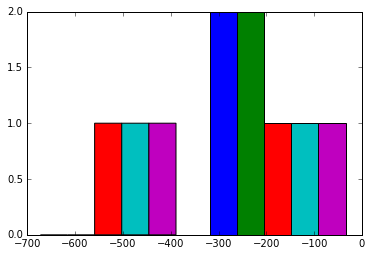

[array([-130.87395627,    0.18438595]), array([-177.08394849,    0.24949037]), array([-354.06729723,    0.498839  ]), array([-529.93391074,    0.74661428]), array([-707.89980982,    0.99734721])]


In [84]:
plt.hist(MC_results, bins=2)
plt.show()

print MC_results

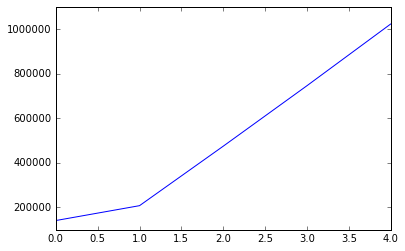

[array(141503.82038685257), array(208120.00506179142), array(474578.56570983527), array(745427.9425876837), array(1021845.1236679697)]
141503.820387


In [85]:
plt.plot(range(0, len(MC_mins)),MC_mins)
plt.show()

print MC_mins
print min(MC_mins)

In [86]:
MC_min = min(MC_mins)
best_MC_params = results[mins.index(min_mins)]
avg_MC_params = [np.mean(results[:][0][0]),np.mean(results[:][0][1])]

print "min: ", MC_min, ", ",best_MC_params
print "avg: ", np.mean(MC_mins), ", ", avg_MC_params

min:  141503.820387 ,  [ 0.02069022  0.03696734]
avg:  518295.091483 ,  [0.020777283738091193, 0.037022310745438061]


In [87]:
MC_Pnevers = PP_test(avg_MC_params)

total_MC_unused = len(MC_unused) * 10
print "total held: ", total_MC_unused
print "expected spent: ", np.mean(MC_Pnevers)*total_MC_unused
print "expected unspent: ", total_unused*(1-np.mean(MC_Pnevers))
 

total held:  24930
expected spent:  23102.4122843
expected unspent:  3117.82212389


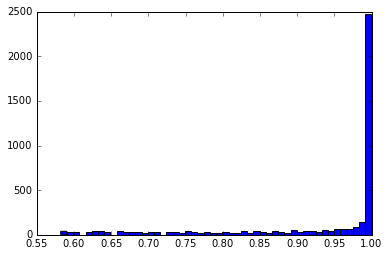

In [88]:
plt.hist(MC_Pnevers,bins=50)
plt.show()

**then run for 1000 times... ridiculous**

 Show that equation 8 is in fact the optimal solution of the functional
